# Image Classification and Segmentation using Hugging Face Pipelines
* Notebook by Adam Lang
* Date: 12/4/2024

# Overview
* In this notebook I am going to demonstrate how to classify images and perform image segmentation using a hugging face pipeline.


# Image Workflow
* For text or NLP workflows we usually take words and convert them into vectors/embeddings and run them through a transformer model to output the result.
* Images are similar, however there are a few differences in the workflow:
  * 1. Image
  ```
    |
  ```
  * 2. Pixels - RGB (255, 255, 255 -- white)
    * numpy array
  ```
    |
  ```
  * 3. Transformer Pipeline


# How to read images
1. Local image directory
  * PIL image library
2. External resource
  * Website (requests)
  * Feed to pipeline




# Image Classification Pipeline Implementation
* The default model used is `google/vit-base-patch16-224`
  * Vision Transformer (ViT) model pre-trained on ImageNet-21k (14 million images, 21,843 classes) at resolution 224x224, and fine-tuned on ImageNet 2012 (1 million images, 1,000 classes) at resolution 224x224.
  * model card: https://huggingface.co/google/vit-base-patch16-224

In [3]:
#install PIL
!pip install pillow

In [10]:
## imports
import PIL # import PIL (case sensitive)
from PIL import Image # import Image from PIL (case sensitive)
import requests
from transformers import pipeline
import pandas as pd

In [6]:
## import image
url = "https://www.bellaandduke.com/wp-content/uploads/2024/10/A-guide-to-German-Shepherds-characteristics-personality-lifespan-and-more-featured-image-1024x683.webp"

# load image from address
image = Image.open(requests.get(url, stream=True).raw) #loaded as numpy array

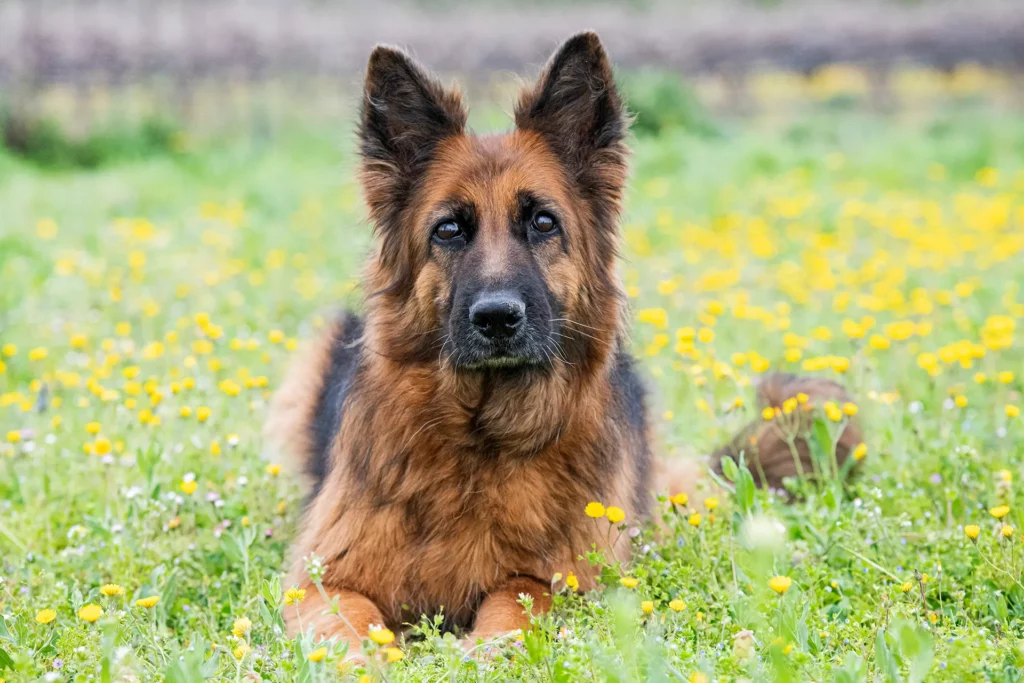

In [7]:
## lets view image
image

In [8]:
## setup pipeline
img_classifier = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [15]:
## get outputs
outputs = img_classifier(image)
#pd.DataFrame(outputs[0:2])
print(outputs[0])

{'label': 'German shepherd, German shepherd dog, German police dog, alsatian', 'score': 0.9815785884857178}


## Try another image classification example

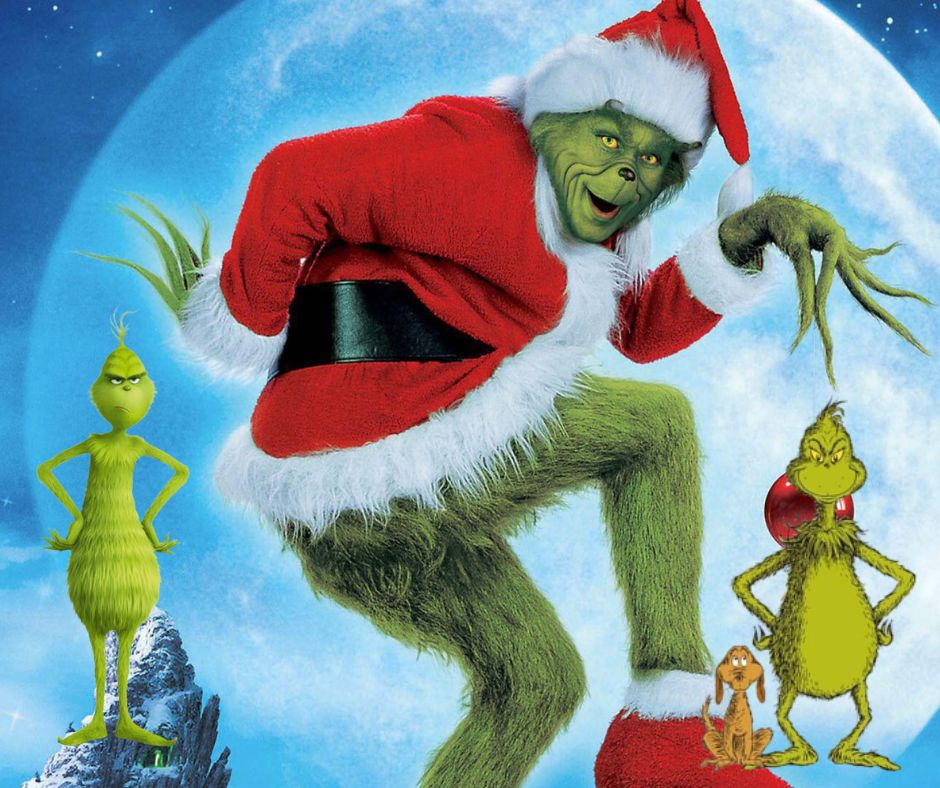

In [17]:
url_2 = "https://granitebeltchristmasfarm.com.au/wp-content/uploads/2023/08/Grinch-1.jpg"

## scrape image
image_2 = Image.open(requests.get(url_2, stream=True).raw) #numpy array
image_2

In [19]:
## run pipeline
img_classifier = pipeline("image-classification")
outputs_2 = img_classifier(image_2)
pd.DataFrame(outputs_2)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


label     score
0                       tray  0.305496
1                toilet seat  0.262589
2                 comic book  0.043547
3  bathing cap, swimming cap  0.029998
4                     buckle  0.016175

Summary:
* Well its clear that the image transformer was not trained on movie posters so the pixels likely confuse the model.
* It is interesting that it picked up a label as "comic book" since the image is closest to that. Also quite interesting that it labeled "toilet seat" because the Grinch character is bending over.
* Obviously to improve classification we would have to fine tune a model or get a model that was pretrained on specific data.

# Let's try an Emotion image classification task
* We will sample this model: `dima806/facial_emotions_image_detection`
  * model card: https://huggingface.co/dima806/facial_emotions_image_detection
  * The model reports facial emotion with about 91% accuracy based on facial human image.


  * In the `config.json` file we can see the `id2label` classes:
```
"id2label": {
    "0": "sad",
    "1": "disgust",
    "2": "angry",
    "3": "neutral",
    "4": "fear",
    "5": "surprise",
    "6": "happy"
  },
```

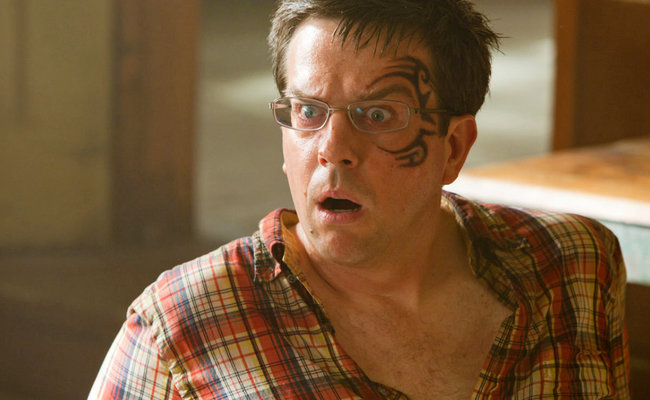

In [23]:
url_emotion = "https://carboncostume.com/wordpress/wp-content/uploads/2019/12/rsz_the-hangover21-1.jpg"
## load test image
image_3 = Image.open(requests.get(url_emotion, stream=True).raw)
image_3

In [24]:
## classify image with model
classifier_emotion = pipeline("image-classification",
                              model='dima806/facial_emotions_image_detection')

outputs_emotion = classifier_emotion(image_3)
pd.DataFrame(outputs_emotion)

config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


label     score
0  surprise  0.891695
1      fear  0.860473
2       sad  0.377640
3     happy  0.319027
4     angry  0.309966

Summary
* Surprise vs. Fear were the top 2 labels which makes sense if you remember this scene from the movie The Hangover this is when Stu had just seen a Tiger in their hotel room.

# Age Clasification of Images
* Let's try this model for classifying the age of a person in the same image above: `nateraw/vit-age-classifier`
  * model card: https://huggingface.co/nateraw/vit-age-classifier
  

In [25]:
## classify image with model
classifier_age = pipeline("image-classification",
                              model='nateraw/vit-age-classifier')

outputs_age = classifier_age(image_3)
pd.DataFrame(outputs_age)

config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


label     score
0  30-39  0.309191
1  20-29  0.229501
2  40-49  0.177039
3  50-59  0.145946
4  60-69  0.058857

Summary:
* The prediction was 30-39 which actually is correct because the actor Ed Helms was around 35 years of age in 2009 when the movie was released.

# Image Segmentation
* We will now demonstrate how to implement transformer models using huggingface pipelines for image segmentation tasks.
* We will try to segment clothes on a person using a model that was trained specifically on this task: `mattmdjaga/segformer_b2_clothes`
  * model card: https://huggingface.co/mattmdjaga/segformer_b2_clothes

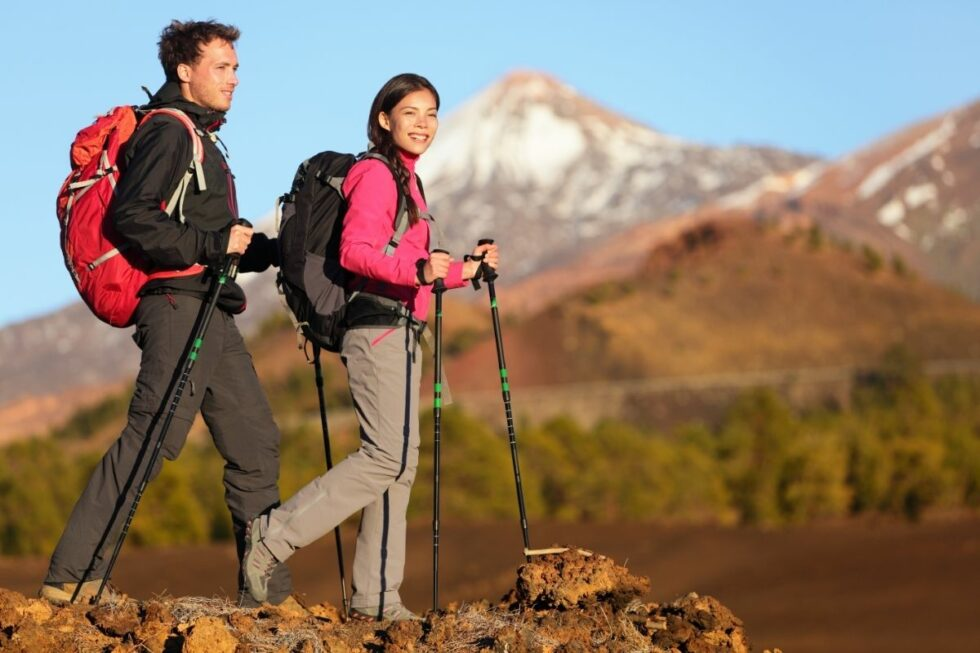

In [26]:
url_clothes = "https://www.merecyclers.com/wp-content/uploads/2022/03/MER-hiking-clothing-980x653.jpg"

## scrape image
image_clothes = Image.open(requests.get(url_clothes, stream=True).raw)
image_clothes

In [28]:
## classify image with model
segmenter = pipeline("image-segmentation",
                              model='mattmdjaga/segformer_b2_clothes')

## output predictions
outputs_clothes = segmenter(image_clothes)
outputs_clothes

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': None,
  'label': 'Background',
  'mask': <PIL.Image.Image image mode=L size=980x653>},
 {'score': None,
  'label': 'Hair',
  'mask': <PIL.Image.Image image mode=L size=980x653>},
 {'score': None,
  'label': 'Upper-clothes',
  'mask': <PIL.Image.Image image mode=L size=980x653>},
 {'score': None,
  'label': 'Pants',
  'mask': <PIL.Image.Image image mode=L size=980x653>},
 {'score': None,
  'label': 'Face',
  'mask': <PIL.Image.Image image mode=L size=980x653>},
 {'score': None,
  'label': 'Right-arm',
  'mask': <PIL.Image.Image image mode=L size=980x653>},
 {'score': None,
  'label': 'Scarf',
  'mask': <PIL.Image.Image image mode=L size=980x653>}]

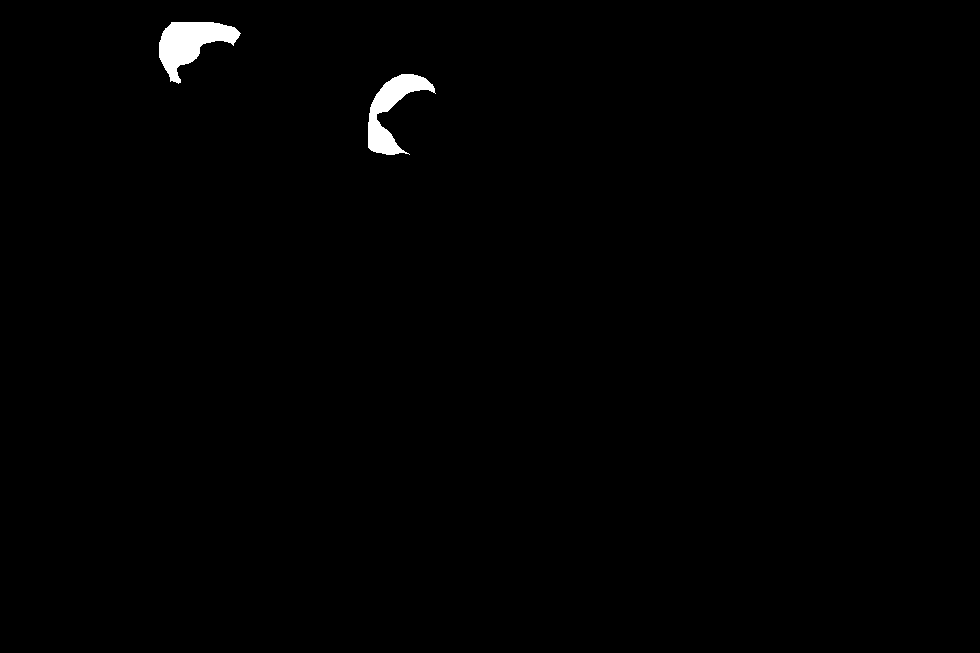

In [30]:
## get mask of first prediction -- "Hair"
outputs_clothes[1]['mask']

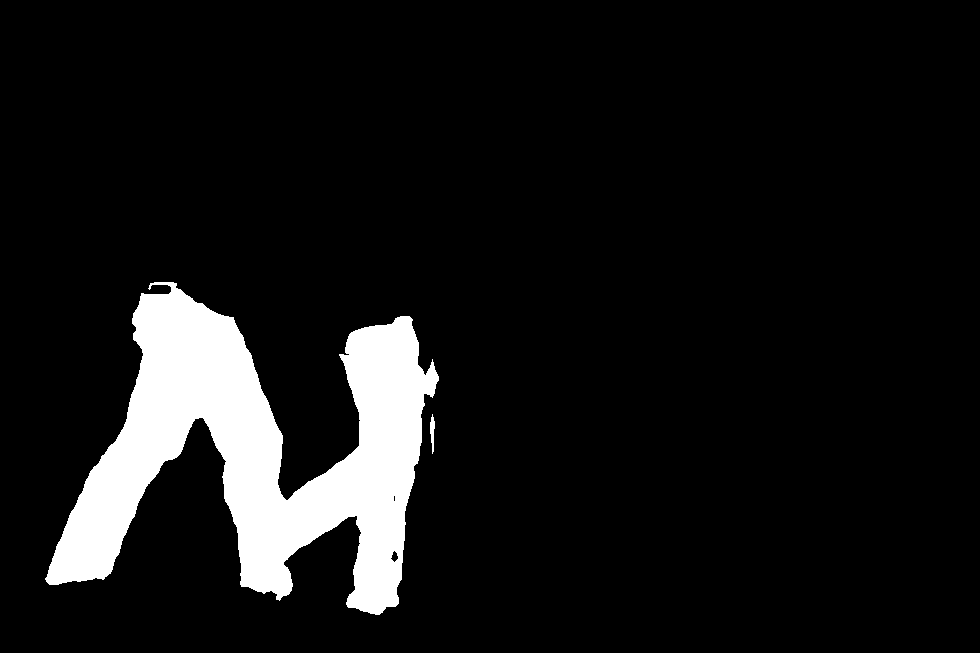

In [32]:
## get mask of first prediction -- "pants"
outputs_clothes[3]['mask']

Summary
* We can see the image masks were correct with the segmentation classification of each person's clothing.
* Another model worth trying in the future is the NVIDIA segformer model: https://huggingface.co/nvidia/segformer-b0-finetuned-ade-512-512